In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context("paper", font_scale=1.6)
sns.set_style('whitegrid')


index = pd.read_csv('GPF_Index.csv')
index = index.rename(columns={'Expression Score':'Expression score'})

/home/bikash/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
times1 = []
for i in range(10):
    
    for j in range(6):
        times1.append('{}h {}min'.format(i, j*10))
times1[:43][-1]

'7h 0min'

#### First file

In [3]:
f1 = pd.read_excel('TIsigner_m_scralet_GFP_first test set.xlsx', sheet_name='Sheet2')
f1 = f1[f1['Unnamed: 0'] == 'induced']
f1 = f1[f1.columns[1:]]
f1.head(2)

,Sample,Expression score,Raw Data (600 1),Raw Data (600 1).1,Raw Data (600 1).2,Raw Data (600 1).3,Raw Data (600 1).4,Raw Data (600 1).5,Raw Data (600 1).6,Raw Data (600 1).7,...,Raw Data (584 3).35,Raw Data (584 3).36,Raw Data (584 3).37,Raw Data (584 3).38,Raw Data (584 3).39,Raw Data (584 3).40,Raw Data (584 3).41,Raw Data (584 3).42,Raw Data (584 3).43,Raw Data (584 3).44
49,202,5.78,0.16,0.161,0.168,0.177,0.193,0.209,0.238,0.261,...,65728,71008,74470,79249,84330,89578,93744,99087,105028,109812
50,202,NaN,0.175,0.174,0.181,0.193,0.212,0.278,0.361,0.431,...,67594,71628,76278,80958,85956,90231,94522,100116,106631,114020


In [3]:
# aa = f1[[i for i in aver_f1.columns.values if '485' in i][:43]]

# for i in aa.columns:
#     if    (aa[i] == 260000).any():
#         print(pd.read_excel('TIsigner_m_scralet_GFP_first test set.xlsx', sheet_name='Sheet2')[i])
#         break
    

In [4]:
map1 = f1[['Sample', 'Expression score']].dropna().reset_index(drop=True)
map1.head()

,Sample,Expression score
0,202,5.78
1,203,7.07
2,204,9.67
3,206,33.20
4,207,37.81


In [5]:
aver_f1 = f1.groupby('Sample').apply(np.mean)
gfp1 = aver_f1[[i for i in aver_f1.columns.values if '485' in i][:43]] #taking upto 7hr only
rfp1 = aver_f1[[i for i in aver_f1.columns.values if '584' in i][:43]]
gfp1.columns = times1[:len(gfp1.columns)]
rfp1.columns = times1[:len(rfp1.columns)]

normalised0 = gfp1/rfp1
normalised0 = normalised0.reset_index()
normalised0 = normalised0.merge(map1, on='Sample')
normalised0 = normalised0.rename(columns={'Sample':'Content'})
normalised0

,Content,0h 0min,0h 10min,0h 20min,0h 30min,0h 40min,0h 50min,1h 0min,1h 10min,1h 20min,...,5h 40min,5h 50min,6h 0min,6h 10min,6h 20min,6h 30min,6h 40min,6h 50min,7h 0min,Expression score
0,202,55.699677,55.298342,53.662871,51.769084,50.138389,46.822350,43.269602,40.803218,37.298759,...,3.318780,3.128795,2.962476,2.805057,2.670272,2.515089,2.416136,2.315468,2.198334,5.78
1,203,53.920984,52.819458,52.698264,49.835445,47.374793,45.542895,42.941032,39.383384,36.654656,...,4.513180,4.275956,4.058014,3.875326,3.647063,3.446387,3.226347,3.027217,2.833487,7.07
2,204,58.494014,55.568134,53.505470,53.782025,51.222835,48.226755,45.480693,41.520458,39.644434,...,3.551641,3.272976,3.118806,2.937835,2.790906,2.666298,2.535759,2.404602,2.285556,9.67
3,206,55.728279,52.614194,52.495268,50.142390,47.437821,45.324098,42.827042,39.946406,36.778193,...,13.986154,13.456396,13.189489,12.819459,12.475808,12.007019,11.797268,11.433597,11.125057,33.20
4,207,54.789042,54.948288,54.476210,51.420371,49.473613,45.808828,43.620672,41.160583,37.515093,...,12.609161,12.328077,12.028641,11.764037,11.564807,11.126961,10.918559,10.543105,10.337972,37.81
5,216,55.774961,54.220763,52.231311,50.804799,48.103604,46.570398,43.789361,41.333197,37.675099,...,11.630705,11.173001,10.637290,10.364484,9.953042,9.542452,9.226511,8.833922,8.488687,97.75
6,220,54.876599,55.152985,52.650188,50.471072,49.105803,46.019998,44.596886,40.720570,38.476647,...,8.159979,7.749517,7.434347,7.049990,6.738928,6.391138,6.086807,5.733523,5.387931,12.12
7,222,52.252916,52.228339,50.658401,47.759845,46.217368,43.717269,39.922095,37.830326,34.792269,...,9.332455,8.962653,8.619737,8.160191,7.860130,7.496828,7.211405,6.876427,6.534688,21.09
8,223,56.110269,58.528396,54.436850,54.703979,52.312245,49.706140,47.226391,42.833998,40.713312,...,11.988140,11.571299,11.063465,10.771695,10.471345,10.069453,9.582780,9.136485,8.847349,21.95
9,232,62.951791,61.380448,60.549213,59.014732,57.714617,55.717966,52.870737,48.825521,47.123018,...,17.868308,17.342081,17.018536,16.663093,16.194226,15.765687,15.585524,15.087895,14.409535,60.55


#### Second file

In [6]:
df_gfp = pd.read_excel('2TIsigner_m_scralet_GFP_first test repeat plus additional.xlsx', sheet_name='GFP_')
df_rfp = pd.read_excel('2TIsigner_m_scralet_GFP_first test repeat plus additional.xlsx', sheet_name='RFP_')

In [10]:
# aa = f1[[i for i in df_gfp.columns.values if '485' in i][:43]]

# for i in aa.columns:
#     if    (aa[i] == 260000).any():
#         print(pd.read_excel('2TIsigner_m_scralet_GFP_first test repeat plus additional.xlsx', sheet_name='GFP_')[i])
#         break

# 320/60

In [7]:
mean_gfp = pd.DataFrame(columns=times1[:len(df_gfp.columns[2:])])

for i, v in enumerate(df_gfp.columns[2:]):
    try:
        mean_gfp.loc[:, times1[i]] = df_gfp.loc[1:].groupby(['Content'])[v].apply(np.mean)
    except Exception:
        print(v)

mean_rfp = pd.DataFrame(columns=times1[:len(df_rfp.columns[2:])])

for i, v in enumerate(df_rfp.columns[2:]):
    try:
        mean_rfp.loc[:, times1[i]] = df_rfp.loc[1:].groupby(['Content'])[v].apply(np.mean)
    except Exception:
        print(v)

In [8]:
normalised1 = mean_gfp/mean_rfp
normalised1 = normalised1[times1[:43]]

map2 = df_gfp[['Content', 'TI signer']].drop_duplicates().dropna().reset_index(drop=True)
map2.columns = ['Content', 'Expression score']
normalised1 = normalised1.merge(map2, on='Content')
normalised1 = normalised1[normalised1['Expression score'] != 'Neg. Control'].reset_index(drop=True)
normalised1

,Content,0h 0min,0h 10min,0h 20min,0h 30min,0h 40min,0h 50min,1h 0min,1h 10min,1h 20min,...,5h 40min,5h 50min,6h 0min,6h 10min,6h 20min,6h 30min,6h 40min,6h 50min,7h 0min,Expression score
0,202,49.901942,49.118824,45.295938,44.865966,41.280765,38.582858,35.006712,32.004471,29.862108,...,2.737886,2.604253,2.510927,2.409929,2.289193,2.219689,2.129822,2.051817,1.961705,5.78
1,203,51.495768,51.040073,48.167816,47.701642,45.623936,40.531940,37.844532,34.088494,31.719980,...,3.632368,3.418350,3.255617,3.113457,2.923576,2.760523,2.626513,2.506537,2.390891,7.07
2,204,55.138932,52.931970,50.664076,48.507474,46.332679,41.885011,38.931660,35.498564,32.129966,...,2.934114,2.786620,2.668812,2.532935,2.433123,2.336186,2.239945,2.160487,2.064584,9.67
3,206,53.260900,53.445548,50.258714,48.650832,45.748173,42.038851,38.324134,35.430258,32.732919,...,11.831038,11.482886,11.068910,10.717023,10.364209,9.992442,9.708134,9.294013,8.922137,33.2
4,207,58.962284,58.351414,53.173343,53.464401,50.330802,47.080642,42.767197,39.075276,35.813031,...,11.749595,11.605522,11.326813,11.307688,11.147744,10.898373,10.692089,10.430718,10.239983,37.81
5,212,51.782807,50.333972,47.258927,45.105949,41.974364,39.523690,37.220560,34.522087,30.611377,...,8.462468,8.087144,7.840851,7.440831,7.133385,6.829584,6.486217,6.281862,5.943763,71.18
6,215,48.267874,46.410825,45.510703,42.185978,41.005721,37.021218,35.066376,31.073291,29.202756,...,8.817760,8.644797,8.244023,7.951313,7.767300,7.390983,7.161548,6.887113,6.742272,96.72
7,216,57.024886,55.811033,52.855770,50.825527,47.300787,45.156393,42.198314,39.208701,35.505374,...,10.638094,10.461919,10.261870,10.022658,9.679255,9.502696,9.265703,8.902883,8.590105,97.75
8,217,44.852721,43.258671,42.361265,40.153379,38.176887,35.870286,34.276441,31.138337,28.448990,...,3.314897,3.115201,2.965720,2.803157,2.662823,2.524698,2.388622,2.272507,2.153432,7.07
9,218,47.019782,45.822517,45.313303,42.391346,39.955731,37.843952,35.649299,32.993494,31.148983,...,4.869161,4.682894,4.475817,4.241264,4.032696,3.848716,3.644247,3.437820,3.274051,9.67


#### Third file

In [9]:
plates = []

for i in [1, 2, 3]:
    if i > 1:
        skiprows = 0
    else:
        skiprows = 1
    plates.append(pd.read_excel('Data summary.xlsx', sheet_name='Plate {}'.format(i), skiprows=skiprows))
plates[0]

,Content,TI_si,Raw Data (485-12/EM520 1),Raw Data (485-12/EM520 1).1,Raw Data (485-12/EM520 1).2,Raw Data (485-12/EM520 1).3,Raw Data (485-12/EM520 1).4,Raw Data (485-12/EM520 1).5,Raw Data (485-12/EM520 1).6,Raw Data (485-12/EM520 1).7,...,Raw Data (584 3).50,Raw Data (584 3).51,Raw Data (584 3).52,Raw Data (584 3).53,Raw Data (584 3).54,Raw Data (584 3).55,Raw Data (584 3).56,Raw Data (584 3).57,Raw Data (584 3).58,Raw Data (584 3).59
0,NaN,NaN,0 h,0 h 10 min,0 h 20 min,0 h 30 min,0 h 40 min,0 h 50 min,1 h,1 h 10 min,...,8 h 42 min,8 h 52 min,9 h 2 min,9 h 12 min,9 h 22 min,9 h 32 min,9 h 42 min,9 h 52 min,10 h 2 min,10 h 12 min
1,Blank,NaN,177623,176801,175254,174364,173788,173844,171909,170624,...,1348,1399,1417,1400,1451,1486,1309,1460,1402,1404
2,Blank,NaN,175676,174609,174215,173027,171244,170272,171340,169826,...,1420,1496,1465,1485,1406,1502,1380,1492,1390,1438
3,Blank,NaN,172877,172722,170991,172358,170604,169862,169772,168965,...,1497,1494,1407,1528,1460,1384,1318,1511,1503,1474
4,Blank,NaN,177161,174204,174920,174206,173108,173840,173196,170794,...,1484,1488,1368,1490,1486,1493,1476,1444,1428,1434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,217,7.07,198691,196993,197511,196319,194868,195320,196510,194576,...,222500,231312,241620,243960,249740,254040,258335,259913,260000,260000
69,227,41.25,201830,200298,200048,200395,196870,196147,198031,196744,...,90860,95714,100031,103630,108464,112090,115914,122522,127005,132202
70,227,41.25,200911,200348,198395,197604,195819,197126,196748,195623,...,92372,97474,101872,105995,111442,114580,119926,124008,128480,136440
71,226,36.68,200268,200656,200380,199060,196573,198468,196639,194541,...,73632,77922,80327,83128,86269,90833,94475,97694,101553,105770


In [10]:
mapping = plates[0][['Content', 'TI_si']].dropna().drop_duplicates().reset_index(drop=True)
# mapping.loc[1] = ['Blank', 'Blank']
# mapping = mapping.reset_index(drop=True)
mapping.columns = ['Content', 'Expression score']
mapping.head(2)

,Content,Expression score
0,222,21.09
1,220,12.12


In [11]:
averaged_dfs_gfp = []
averaged_dfs_rfp = []

averaged = [averaged_dfs_gfp, averaged_dfs_rfp]
times = times1[:43]


for df in plates:
    fl_columns_gfp = ['Content'] + [ i for i in df.columns if '485' in i][:len(times)]
    fl_columns_rfp = ['Content'] + [ i for i in df.columns if '584' in i][:len(times)]


    for p, q in enumerate([fl_columns_gfp, fl_columns_rfp]):
        temp_ = pd.DataFrame(columns=times)
#         temp_std = pd.DataFrame(columns=times)
        
        temp_df = df[q]
        
        for i, v in enumerate(temp_df.columns[1:]):
            try:
                temp_.loc[:, times[i]] = temp_df.loc[1:].groupby(['Content'])[v].apply(np.mean)

            except Exception:
                print(i, p)
#                 pass
        temp_.columns = times1[:len(temp_.columns)]
        averaged[p].append(temp_)


In [12]:
# GFP/RFP
ratio = [v/averaged_dfs_rfp[i] for i, v in enumerate(averaged_dfs_gfp)]
ratio = [i.reset_index().merge(mapping, on='Content') for i in ratio]
ratio = [i[i['Expression score'] != 'neg. control'] for i in ratio]

In [13]:
# Ratio has 3 biological reps from plate 1, 2, 3
ratio[0]

,Content,0h 0min,0h 10min,0h 20min,0h 30min,0h 40min,0h 50min,1h 0min,1h 10min,1h 20min,...,5h 40min,5h 50min,6h 0min,6h 10min,6h 20min,6h 30min,6h 40min,6h 50min,7h 0min,Expression score
1,202,60.706131,58.186481,56.645762,53.436606,51.544385,49.715352,45.008980,41.424729,37.364190,...,2.755437,2.564360,2.392503,2.230567,2.097666,1.938488,1.801122,1.669863,1.563547,5.78
2,203,61.806675,60.871431,56.960634,56.402712,52.533689,48.793512,45.563513,42.374170,37.908398,...,3.956327,3.673579,3.336324,3.101992,2.848643,2.543375,2.294142,2.099562,1.926168,7.07
3,204,59.292648,56.604609,54.883363,52.505967,49.895937,47.829754,44.045652,39.527405,36.525021,...,2.778257,2.593429,2.350862,2.179547,1.996288,1.843361,1.708072,1.581573,1.472067,9.67
4,206,62.514609,62.719094,60.572335,58.031255,56.306702,53.042385,48.902709,45.198314,41.682389,...,9.683118,9.093930,8.613264,8.176358,7.809801,7.311175,6.970883,6.557625,6.283380,33.2
5,207,59.985288,55.450908,56.049301,52.685681,50.372677,47.416458,43.903269,40.754766,36.253812,...,7.904263,7.555833,7.250519,6.855546,6.620999,6.415080,6.022980,5.812589,5.535212,37.81
6,210,54.754691,55.516821,53.728306,51.268347,48.137491,46.514258,42.916355,38.482120,34.959082,...,5.305720,4.918062,4.675438,4.329004,4.048898,3.727625,3.507139,3.247321,3.008615,57.84
7,212,60.368405,57.309023,56.571408,53.248995,50.904427,48.038173,44.504194,39.867838,37.271883,...,7.887789,7.504165,7.103922,6.749390,6.398268,6.124276,5.728134,5.475702,5.175932,71.18
8,215,57.771826,56.941316,55.278500,52.724447,50.092742,46.545614,44.334553,39.979528,35.247083,...,8.683082,8.314335,7.848622,7.706339,7.434145,7.186962,6.784470,6.629355,6.309761,96.72
9,216,59.863517,58.852835,57.142412,54.066355,51.539388,47.923068,44.156915,40.106099,37.405393,...,8.559794,8.253169,7.981176,7.753443,7.426729,7.153131,6.955530,6.768020,6.525122,97.75
10,217,56.585307,56.489152,53.201778,50.719108,49.235153,46.403654,41.855420,39.964857,34.928714,...,4.105393,3.811960,3.511060,3.202053,2.915719,2.609549,2.334346,2.124866,1.945651,7.07


### All biological replicates

##### (Excluding the 3rd one from the final data because it had problems with shaking.)

In [14]:
all_biological_reps = [normalised0, normalised1] + ratio[:2]

In [24]:
# const = []

# for i, v in enumerate(all_biological_reps):
#     for p, q in enumerate(v['Expression score']):
#         const.append(q)

# from collections import Counter
# Counter(const)

In [15]:
const = []

for i, v in enumerate(all_biological_reps):
    for p, q in enumerate(v['Content']):
        const.append(q)

from collections import Counter
Counter(const)

Counter({202: 4,
         203: 4,
         204: 4,
         206: 4,
         207: 4,
         216: 4,
         220: 4,
         222: 4,
         223: 4,
         232: 4,
         233: 4,
         239: 4,
         212: 3,
         215: 3,
         217: 3,
         218: 3,
         219: 3,
         225: 3,
         235: 3,
         236: 3,
         237: 3,
         241: 3,
         210: 2,
         224: 2,
         226: 2,
         227: 2,
         230: 2,
         243: 2,
         247: 2})

In [16]:
all_biological_reps = [i[i['Content'].apply(lambda x: Counter(const)[x] >=3 )] for i in all_biological_reps]

In [17]:
print('These are present in all biological reps.')
set.intersection(*map(set,[i['Content'] for i in all_biological_reps])), \
set.intersection(*map(set,[i['Expression score'] for i in all_biological_reps]))

These are present in all biological reps.


({202, 203, 204, 206, 207, 216, 220, 222, 223, 232, 233, 239},
 {5.78,
  7.07,
  9.67,
  12.12,
  21.09,
  21.95,
  33.2,
  37.81,
  60.55,
  67.45,
  90.29,
  97.75})

In [18]:

fl_df = pd.DataFrame(index=list(Counter(const).keys())[:-7], columns=times1[:43])

for i, v in enumerate(fl_df.index):
    for p, q in enumerate(fl_df.columns):
        temp = []
        for m, n in enumerate(all_biological_reps):
            try:
                temp.append(np.round(n[n.Content == v][q].values[0], 2))
            except Exception:
                pass
        fl_df.loc[v][q] = temp
        
# fl_df = fl_df.round(2)

In [19]:
fl_df.shape[0]

22

In [20]:
times = times1[:43]

std_df = pd.DataFrame(index=fl_df.index, columns=times)
mean_df = pd.DataFrame(index=fl_df.index, columns=times)

for i in times:
    std_df[i] = fl_df[i].apply(lambda x: np.std(x, ddof=1))
    mean_df[i] = fl_df[i].apply(np.mean)
    
std_df = std_df.round(2)
mean_df = mean_df.round(2)

In [21]:

map1_ = map1.copy()
map1_ = map1_.rename(columns={'Sample':'Content'})

all_map = pd.concat([map1_, map2, mapping]).drop_duplicates()
all_map = all_map[all_map.Content != 179]
all_map = all_map.rename(columns={'Content':'index'})

all_map = all_map.merge(index, on='Expression score')
all_map = all_map.drop([2, 4]).reset_index(drop=True)
all_map['First 30 nt'][2] = 'ATGAGTAAAGGGGAAGAACTCTTTACCGGG'
all_map

/home/bikash/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,index,Expression score,Type,First 30 nt,Opening Energy
0,202,5.78,Optimised,ATGTCGAAGGGTGAAGAACTCTTCACTGGT,21.68
1,203,7.07,Optimised,ATGAGTAAAGGGGAGGAACTCTTTACCGGG,20.37
2,217,7.07,Optimised,ATGAGTAAAGGGGAAGAACTCTTTACCGGG,20.37
3,204,9.67,Optimised,ATGTCGAAGGGCGAAGAACTCTTCACTGGT,18.80
4,218,9.67,Optimised,ATGTCGAAGGGCGAAGAACTCTTCACTGGT,18.80
5,206,33.2,Optimised,ATGTCGAAAGGGGAAGAACTGTTCACCGGC,14.23
6,207,37.81,Optimised,ATGTCTAAAGGAGAAGAGCTTTTCACTGGG,13.77
7,216,97.75,Optimised,ATGAGCAAAGGGGAAGAATTATTTACAGGT,5.56
8,220,12.12,Optimised,ATGTCGAAGGGTGAAGAACTTTTCACTGGG,17.84
9,222,21.09,Optimised,ATGTCCAAAGGTGAAGAGCTTTTCACCGGG,15.80


In [22]:
mean_df.reset_index().merge(all_map, on='index').set_index('index')

,0h 0min,0h 10min,0h 20min,0h 30min,0h 40min,0h 50min,1h 0min,1h 10min,1h 20min,1h 30min,...,6h 10min,6h 20min,6h 30min,6h 40min,6h 50min,7h 0min,Expression score,Type,First 30 nt,Opening Energy
index,,,,,,,,,,,,,,,,,,,,,
202,56.42,55.25,53.19,50.76,48.21,44.97,41.16,37.97,34.73,31.24,...,2.37,2.24,2.11,2.00,1.89,1.79,5.78,Optimised,ATGTCGAAGGGTGAAGAACTCTTCACTGGT,21.68
203,56.11,55.39,52.90,51.24,48.06,44.47,41.34,37.84,34.22,30.38,...,3.20,2.97,2.74,2.54,2.37,2.21,7.07,Optimised,ATGAGTAAAGGGGAGGAACTCTTTACCGGG,20.37
204,57.90,55.29,53.07,51.10,48.82,45.34,42.46,38.31,35.30,31.75,...,2.39,2.25,2.12,2.00,1.89,1.78,9.67,Optimised,ATGTCGAAGGGCGAAGAACTCTTCACTGGT,18.80
206,58.30,57.46,55.13,53.16,50.52,46.94,43.46,39.97,36.59,33.05,...,10.08,9.70,9.26,8.94,8.56,8.22,33.2,Optimised,ATGTCGAAAGGGGAAGAACTGTTCACCGGC,14.23
207,58.47,56.31,55.05,52.11,49.28,45.80,42.68,39.12,35.40,32.29,...,9.24,9.00,8.71,8.44,8.17,7.94,37.81,Optimised,ATGTCTAAAGGAGAAGAGCTTTTCACTGGG,13.77
216,58.98,57.15,54.42,52.18,48.70,45.93,43.01,39.61,35.88,32.82,...,9.13,8.74,8.45,8.18,7.88,7.58,97.75,Optimised,ATGAGCAAAGGGGAAGAATTATTTACAGGT,5.56
220,60.16,59.10,58.20,55.10,52.12,48.75,45.75,41.89,38.56,34.96,...,6.87,6.63,6.30,6.03,5.78,5.48,12.12,Optimised,ATGTCGAAGGGTGAAGAACTTTTCACTGGG,17.84
222,60.26,59.96,56.93,54.04,50.96,47.38,43.56,40.36,37.00,33.02,...,7.76,7.42,7.10,6.81,6.51,6.18,21.09,Optimised,ATGTCCAAAGGTGAAGAGCTTTTCACCGGG,15.80
223,58.92,58.84,56.77,54.30,51.26,49.10,44.86,41.23,37.74,34.61,...,8.85,8.54,8.24,7.84,7.56,7.29,21.95,Optimised,ATGTCGAAAGGTGAAGAGCTGTTCACCGGT,15.66


In [23]:
final_mean_df = mean_df.reset_index().merge(all_map, on='index').set_index('index')
final_mean_df = final_mean_df.rename(columns={'Expression score': 'Expression Score'})

In [25]:
from scipy.stats import spearmanr

sp = []

for i, v in enumerate(times):
    sp.append(spearmanr(final_mean_df['Expression Score'], final_mean_df[v]))

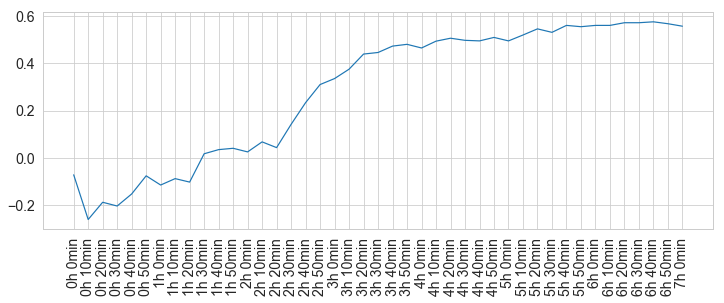

In [26]:
plt.figure(figsize=(12, 4))
ax = sns.lineplot(times[:43], [i[0] for i in sp])
plt.xticks(rotation=90);

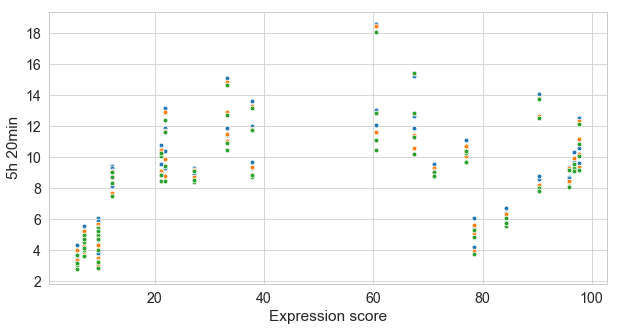

In [27]:
plt.figure(figsize=(10, 5))


for i in ['5h 0min', '5h 10min', '5h 20min']:
    ddd = pd.merge(all_map, pd.DataFrame(fl_df[i]).reset_index().explode(i), on='index')
    sns.scatterplot(data=ddd, x='Expression score', y=i, )

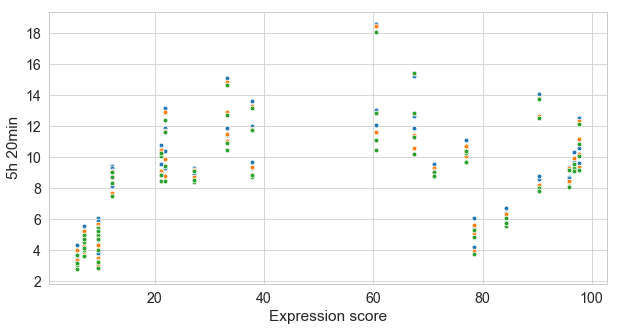

In [28]:
plt.figure(figsize=(10, 5))


for i in ['5h 0min', '5h 10min', '5h 20min']:
    ddd = pd.merge(all_map, pd.DataFrame(fl_df[i]).reset_index().explode(i), on='index')
    sns.scatterplot(data=ddd, x='Expression score', y=i, )

In [29]:
ddd

,index,Expression score,Type,First 30 nt,Opening Energy,5h 20min
0,202,5.78,Optimised,ATGTCGAAGGGTGAAGAACTCTTCACTGGT,21.68,3.7
1,202,5.78,Optimised,ATGTCGAAGGGTGAAGAACTCTTCACTGGT,21.68,3.07
2,202,5.78,Optimised,ATGTCGAAGGGTGAAGAACTCTTCACTGGT,21.68,3.18
3,202,5.78,Optimised,ATGTCGAAGGGTGAAGAACTCTTCACTGGT,21.68,2.81
4,203,7.07,Optimised,ATGAGTAAAGGGGAGGAACTCTTTACCGGG,20.37,4.99
...,...,...,...,...,...,...
73,225,27.23,Optimised,ATGAGTAAGGGGGAGGAGCTCTTCACCGGA,14.92,8.38
74,225,27.23,Optimised,ATGAGTAAGGGGGAGGAGCTCTTCACCGGA,14.92,8.52
75,219,9.7,Optimised,ATGTCGAAGGGTGAAGAACTGTTCACTGGT,18.79,4.74
76,219,9.7,Optimised,ATGTCGAAGGGTGAAGAACTGTTCACTGGT,18.79,5.23


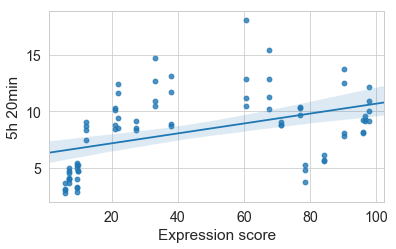

In [30]:
plt.figure(figsize=(6, 3.5))

ddd = pd.merge(all_map, pd.DataFrame(fl_df['5h 20min']).reset_index().explode('5h 20min'), on='index')
sns.regplot(data=ddd[['Expression score', '5h 20min']].astype(float), x='Expression score', y='5h 20min', )

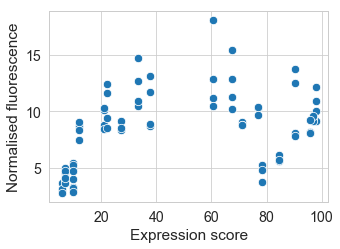

In [39]:
plt.figure(figsize=(5, 3.5))
sns.scatterplot(data=ddd[['Expression score', '5h 20min']].astype(float), x='Expression score', y='5h 20min', s=70)
plt.ylabel('Normalised fluorescence');

plt.savefig('GFP.pdf', bbox_inches='tight', pad_inches=0);

##### For website

In [32]:

to_json = final_mean_df[['Type', 'First 30 nt', 'Opening Energy', 'Expression Score']].copy()
to_json.loc[200] = ['Native', 'ATGAGTAAAGGAGAAGAACTTTTCACTGGA', 11.68, 62.89]
to_json.to_json(orient='records')



'[{"Type":"Optimised","First 30 nt":"ATGTCGAAGGGTGAAGAACTCTTCACTGGT","Opening Energy":21.68,"Expression Score":5.78},{"Type":"Optimised","First 30 nt":"ATGAGTAAAGGGGAGGAACTCTTTACCGGG","Opening Energy":20.37,"Expression Score":7.07},{"Type":"Optimised","First 30 nt":"ATGTCGAAGGGCGAAGAACTCTTCACTGGT","Opening Energy":18.8,"Expression Score":9.67},{"Type":"Optimised","First 30 nt":"ATGTCGAAAGGGGAAGAACTGTTCACCGGC","Opening Energy":14.23,"Expression Score":33.2},{"Type":"Optimised","First 30 nt":"ATGTCTAAAGGAGAAGAGCTTTTCACTGGG","Opening Energy":13.77,"Expression Score":37.81},{"Type":"Optimised","First 30 nt":"ATGAGCAAAGGGGAAGAATTATTTACAGGT","Opening Energy":5.56,"Expression Score":97.75},{"Type":"Optimised","First 30 nt":"ATGTCGAAGGGTGAAGAACTTTTCACTGGG","Opening Energy":17.84,"Expression Score":12.12},{"Type":"Optimised","First 30 nt":"ATGTCCAAAGGTGAAGAGCTTTTCACCGGG","Opening Energy":15.8,"Expression Score":21.09},{"Type":"Optimised","First 30 nt":"ATGTCGAAAGGTGAAGAGCTGTTCACCGGT","Opening E

In [33]:
mean_fl_df = final_mean_df.round(2)
# mean_fl_df

In [34]:
all_dict = {}

for i, v in enumerate(mean_fl_df.index):
    new_dict = {}
    new_dict['Type'] = mean_fl_df.loc[v]['Type']
    new_dict['First 30 nt'] = mean_fl_df.loc[v]['First 30 nt']
    new_dict['Opening Energy'] = mean_fl_df.loc[v]['Opening Energy']
    new_dict['Expression Score'] = mean_fl_df.loc[v]['Expression Score']
    data = {}
    for p, q in enumerate(times):
        data_dict = {}
        data_dict["Time"] = q
        data_dict["All Fluorescence"] = fl_df.loc[v][q]
        data_dict["Mean Fluorescence"] = mean_df.loc[v][q]
        data_dict["Std Fluorescence"] = std_df.loc[v][q]
        data[p] = data_dict
    new_dict['Data'] = [v for k, v in data.items()]
    all_dict[i] = new_dict

In [35]:
import json 

json.dumps([v for k, v in all_dict.items()])

'[{"Type": "Optimised", "First 30 nt": "ATGTCGAAGGGTGAAGAACTCTTCACTGGT", "Opening Energy": 21.68, "Expression Score": 5.78, "Data": [{"Time": "0h 0min", "All Fluorescence": [55.7, 49.9, 60.71, 59.35], "Mean Fluorescence": 56.42, "Std Fluorescence": 4.83}, {"Time": "0h 10min", "All Fluorescence": [55.3, 49.12, 58.19, 58.39], "Mean Fluorescence": 55.25, "Std Fluorescence": 4.32}, {"Time": "0h 20min", "All Fluorescence": [53.66, 45.3, 56.65, 57.16], "Mean Fluorescence": 53.19, "Std Fluorescence": 5.48}, {"Time": "0h 30min", "All Fluorescence": [51.77, 44.87, 53.44, 52.94], "Mean Fluorescence": 50.76, "Std Fluorescence": 3.99}, {"Time": "0h 40min", "All Fluorescence": [50.14, 41.28, 51.54, 49.87], "Mean Fluorescence": 48.21, "Std Fluorescence": 4.68}, {"Time": "0h 50min", "All Fluorescence": [46.82, 38.58, 49.72, 44.75], "Mean Fluorescence": 44.97, "Std Fluorescence": 4.72}, {"Time": "1h 0min", "All Fluorescence": [43.27, 35.01, 45.01, 41.33], "Mean Fluorescence": 41.16, "Std Fluorescence"

In [88]:
# times.index('5h 20min')

In [36]:
corr_dict = {}

for i, v in enumerate(times):
    new_dict = {}
    new_dict['Time'] = v
#     new_dict['Individual SpearmanR'] = np.round(np.random.rand(5), 2).tolist()
#     new_dict['Individual Pvalue'] = np.round(np.random.rand(5), 2).tolist()
    new_dict['Mean SpearmanR'] = np.round(sp[i][0], 2)
    new_dict['Mean Pvalue'] = np.round(sp[i][1], 2)
    corr_dict[i] = new_dict

In [37]:
json.dumps([v for k, v in corr_dict.items()])

'[{"Time": "0h 0min", "Mean SpearmanR": -0.07, "Mean Pvalue": 0.75}, {"Time": "0h 10min", "Mean SpearmanR": -0.26, "Mean Pvalue": 0.24}, {"Time": "0h 20min", "Mean SpearmanR": -0.19, "Mean Pvalue": 0.4}, {"Time": "0h 30min", "Mean SpearmanR": -0.2, "Mean Pvalue": 0.37}, {"Time": "0h 40min", "Mean SpearmanR": -0.15, "Mean Pvalue": 0.5}, {"Time": "0h 50min", "Mean SpearmanR": -0.08, "Mean Pvalue": 0.74}, {"Time": "1h 0min", "Mean SpearmanR": -0.11, "Mean Pvalue": 0.61}, {"Time": "1h 10min", "Mean SpearmanR": -0.09, "Mean Pvalue": 0.7}, {"Time": "1h 20min", "Mean SpearmanR": -0.1, "Mean Pvalue": 0.65}, {"Time": "1h 30min", "Mean SpearmanR": 0.02, "Mean Pvalue": 0.94}, {"Time": "1h 40min", "Mean SpearmanR": 0.04, "Mean Pvalue": 0.88}, {"Time": "1h 50min", "Mean SpearmanR": 0.04, "Mean Pvalue": 0.86}, {"Time": "2h 0min", "Mean SpearmanR": 0.03, "Mean Pvalue": 0.91}, {"Time": "2h 10min", "Mean SpearmanR": 0.07, "Mean Pvalue": 0.76}, {"Time": "2h 20min", "Mean SpearmanR": 0.04, "Mean Pvalue":